In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
data = pd.read_csv('sensor.csv')

In [263]:
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [264]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [266]:
data.drop('sensor_15', axis=1, inplace=True)

In [267]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'].dtype

dtype('<M8[ns]')

In [268]:
data.index = data['timestamp']
data.drop('timestamp', axis=1, inplace=True)

In [269]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [270]:
data.tail()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,15.01013,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [271]:
data.index.nunique()

220320

In [272]:
data['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [273]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [274]:
data.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [275]:
missing = pd.DataFrame(data.isnull().mean()*100, columns=['missing_%'])
missing.sort_values(by='missing_%', ascending=False)

,missing_%
sensor_50,34.956881
sensor_51,6.982117
sensor_00,4.633261
sensor_07,2.474129
sensor_08,2.317992
sensor_06,2.177741
sensor_09,2.085603
sensor_01,0.167484
sensor_30,0.118464
sensor_29,0.032680


In [276]:
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].median())

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       220320 non-null  float64
 1   sensor_01       220320 non-null  float64
 2   sensor_02       220320 non-null  float64
 3   sensor_03       220320 non-null  float64
 4   sensor_04       220320 non-null  float64
 5   sensor_05       220320 non-null  float64
 6   sensor_06       220320 non-null  float64
 7   sensor_07       220320 non-null  float64
 8   sensor_08       220320 non-null  float64
 9   sensor_09       220320 non-null  float64
 10  sensor_10       220320 non-null  float64
 11  sensor_11       220320 non-null  float64
 12  sensor_12       220320 non-null  float64
 13  sensor_13       220320 non-null  float64
 14  sensor_14       220320 non-null  float64
 15  sensor_16       220320 non-null  float64
 16  sensor_17       220320

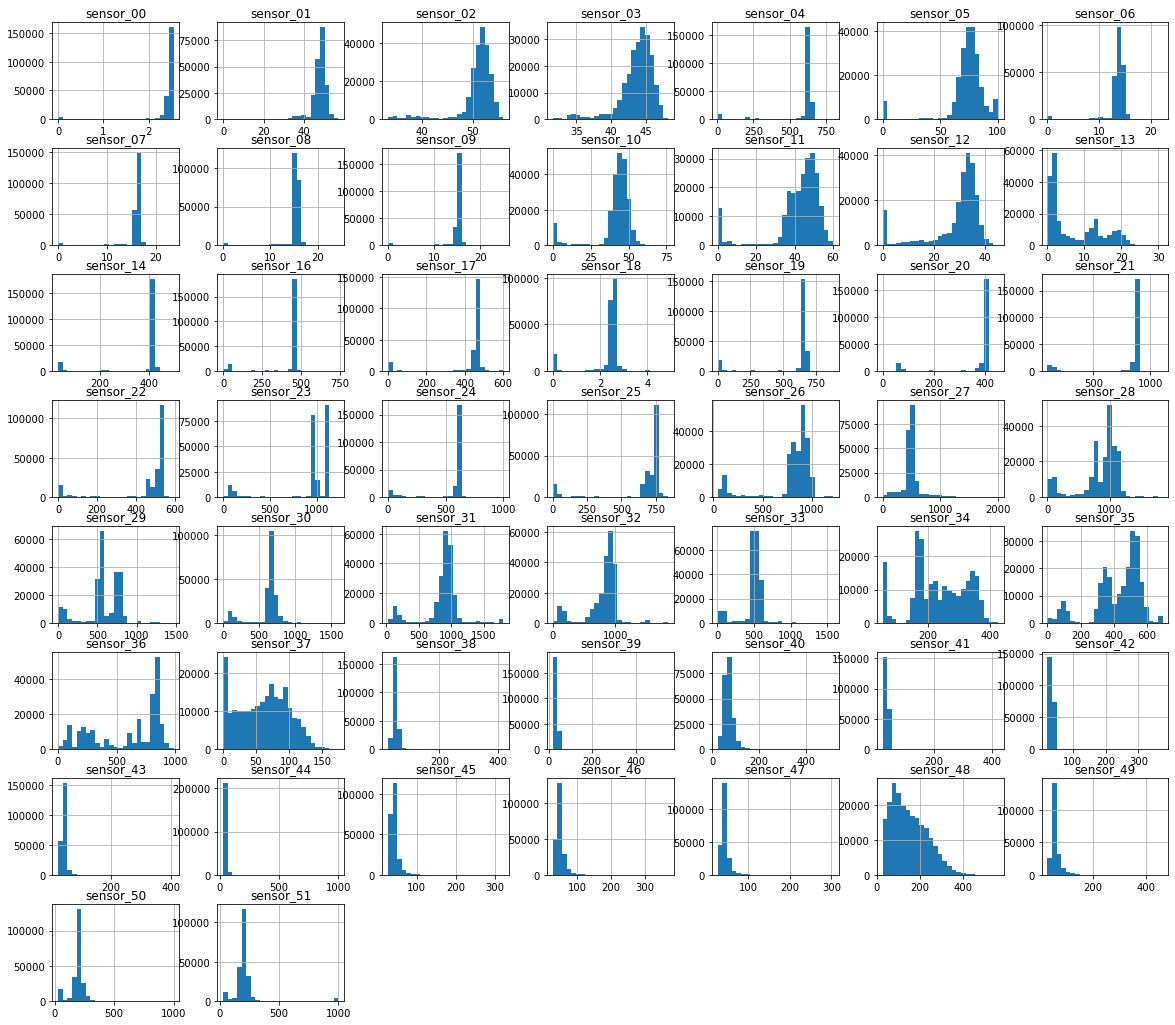

In [278]:
data.hist(bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

In [319]:
df = data.drop('machine_status', axis=1)
status = data['machine_status']
status_broken = data[(data['machine_status']=='BROKEN') | (data['machine_status']=='RECOVERING')]

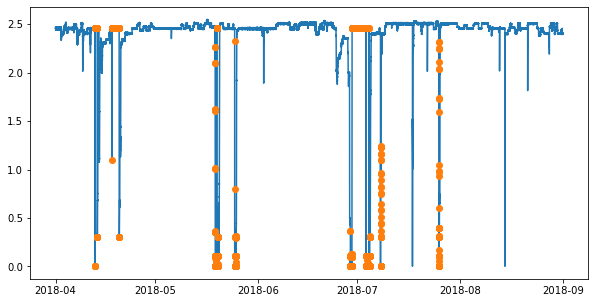

In [320]:
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_00'])
plt.plot(status_broken['sensor_00'], linestyle='none', marker = 'o')

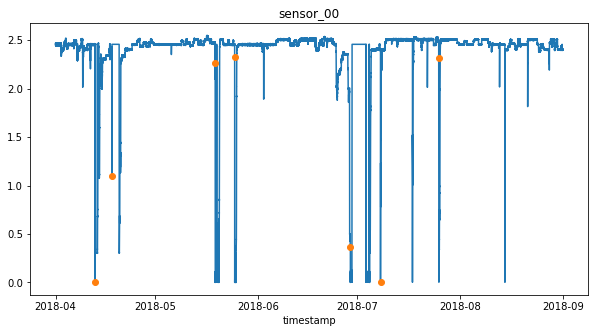

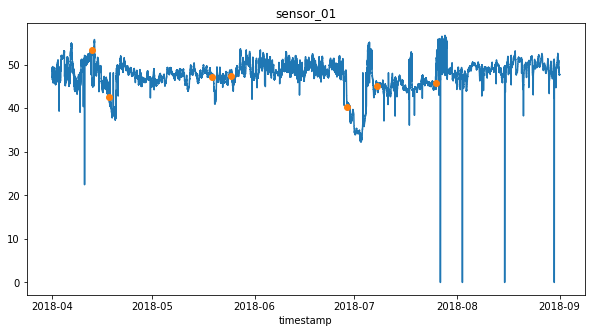

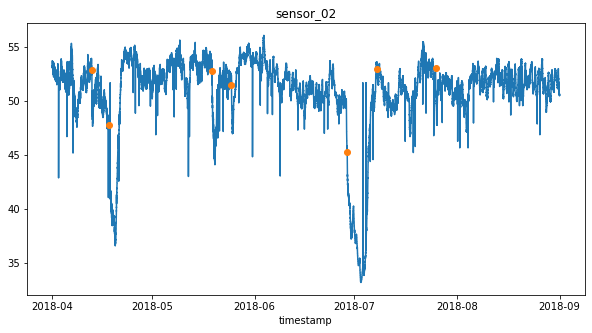

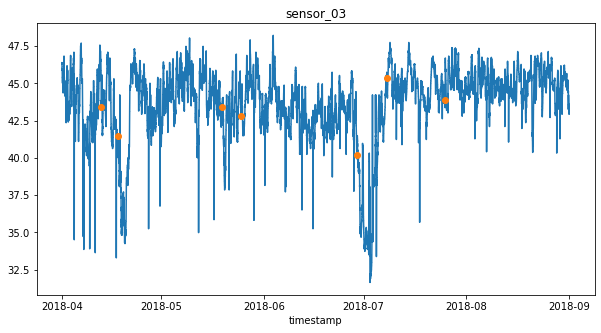

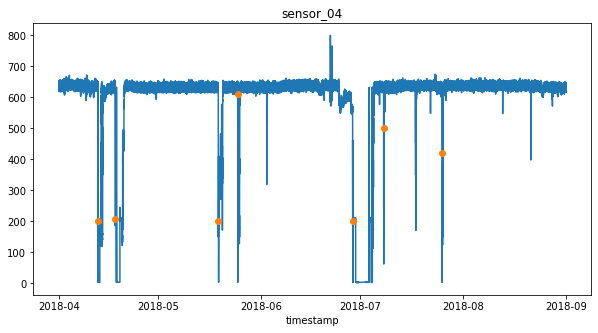

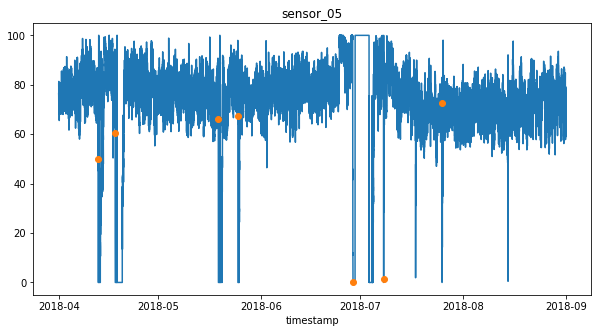

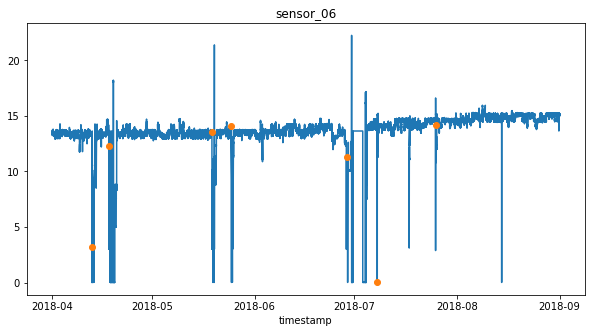

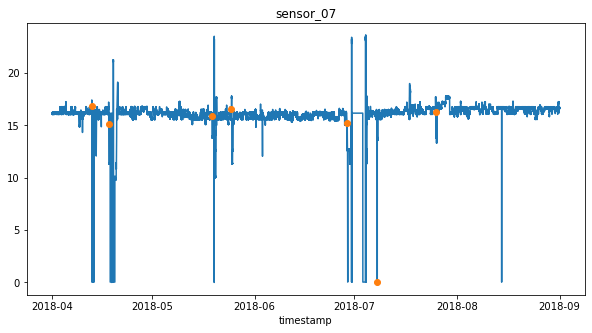

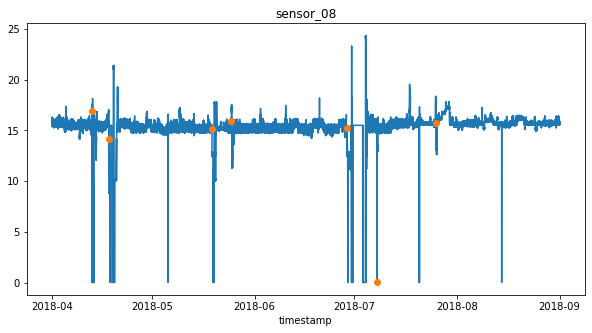

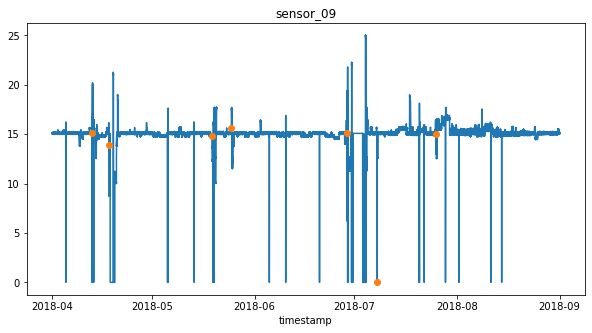

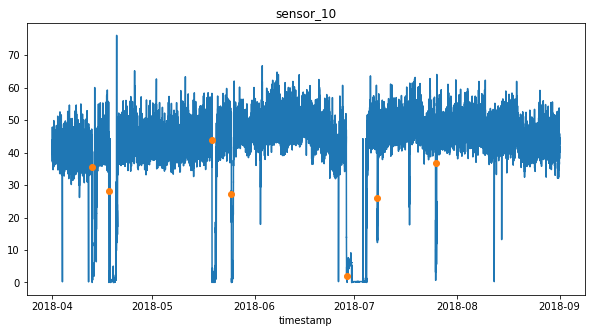

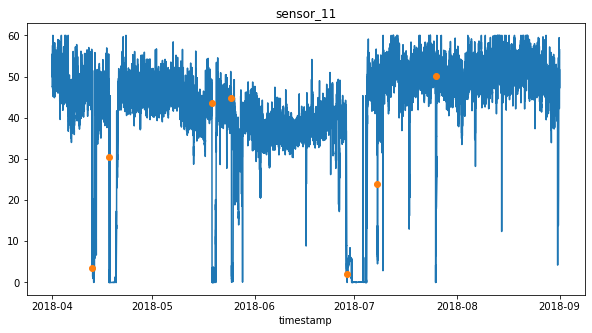

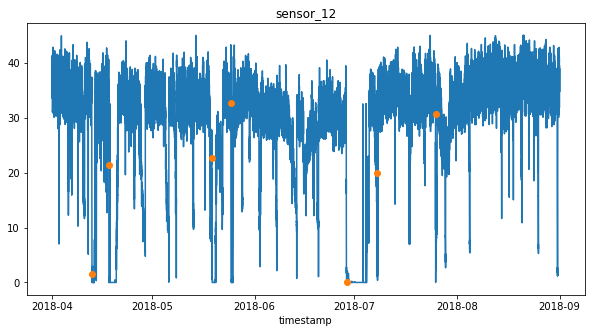

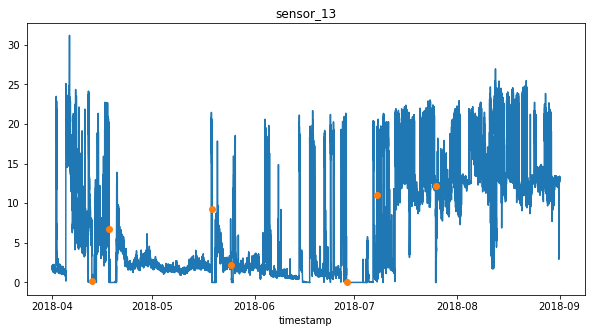

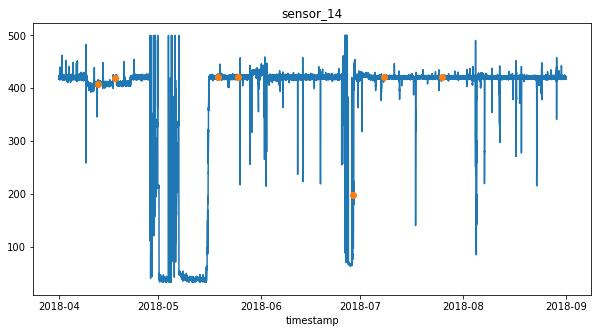

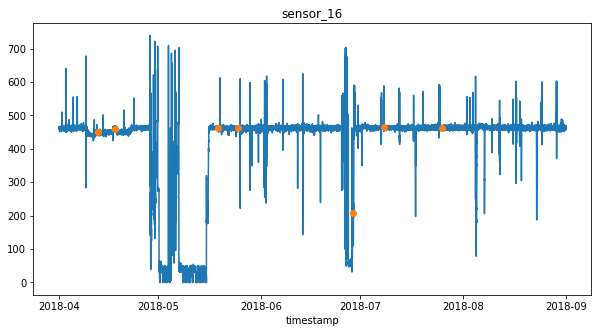

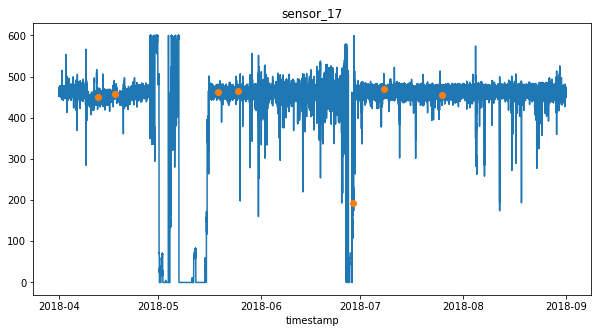

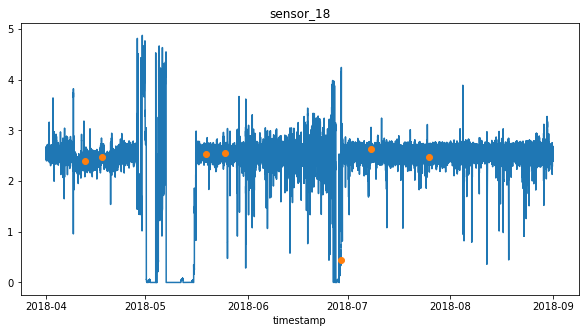

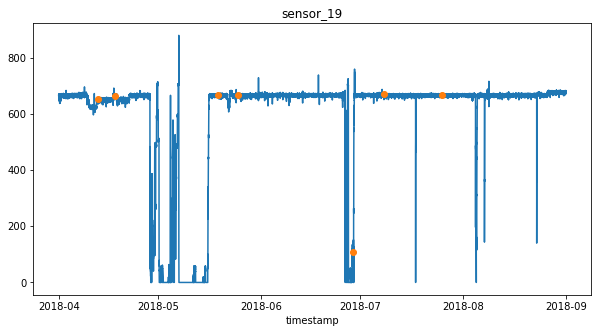

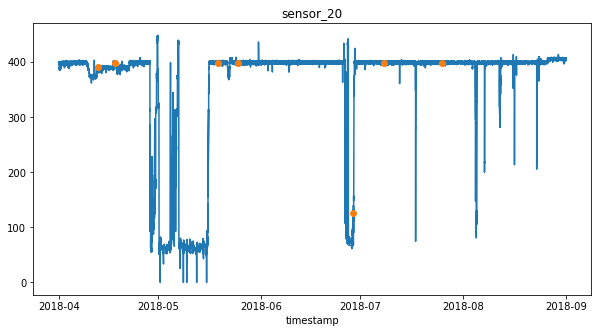

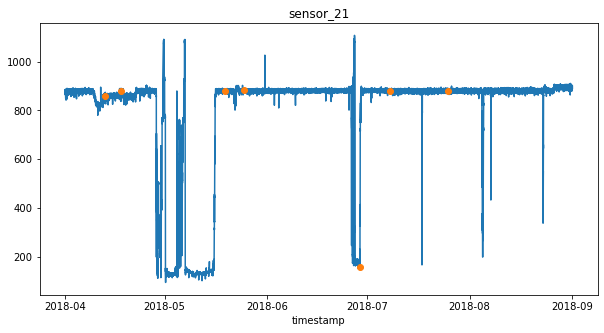

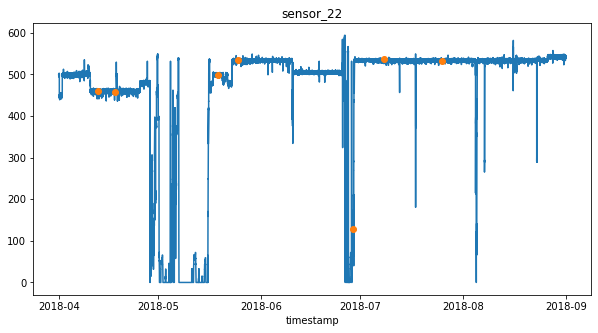

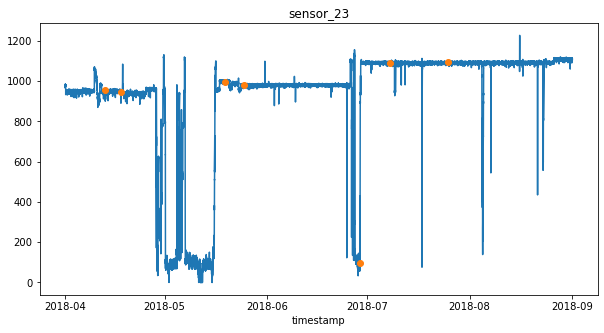

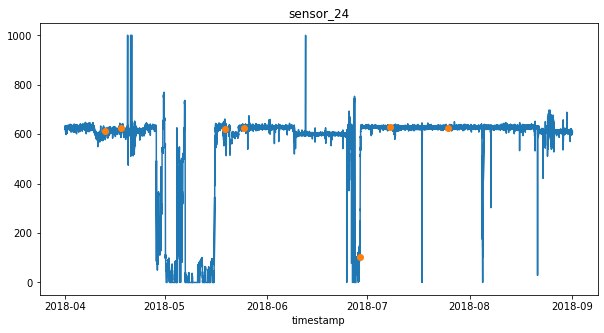

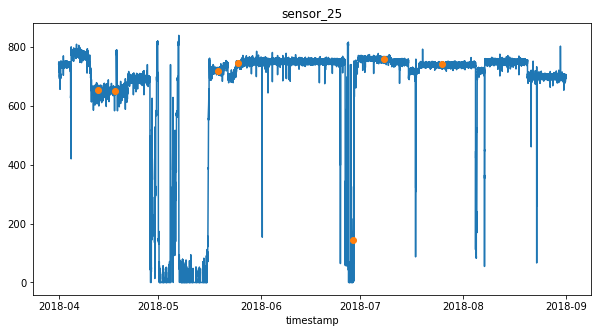

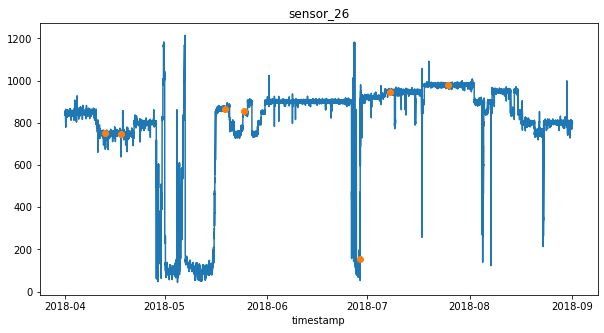

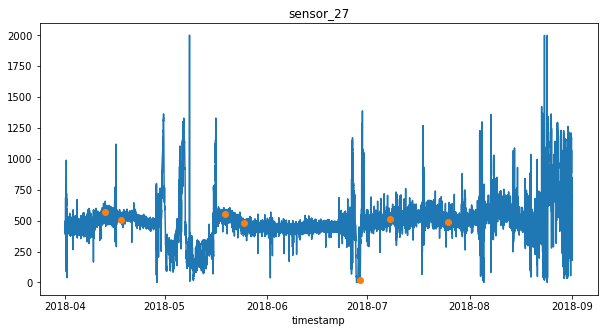

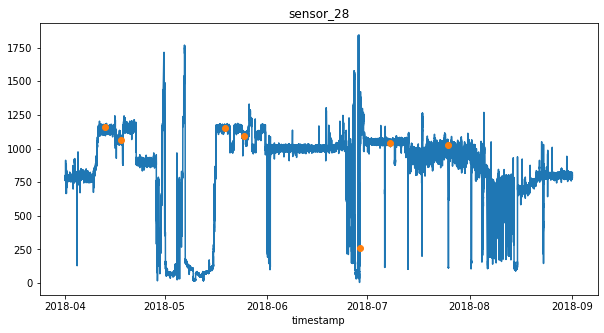

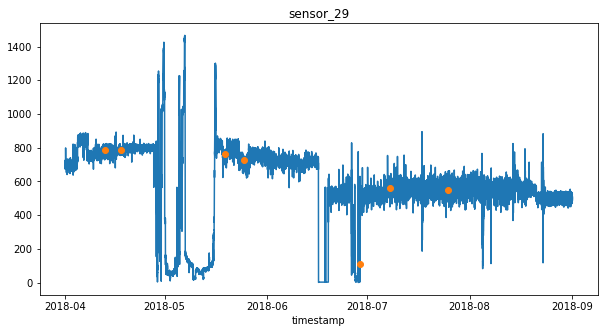

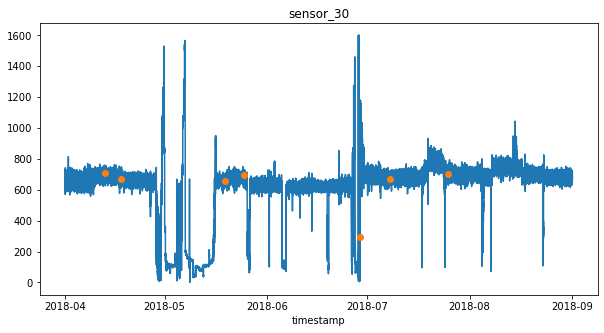

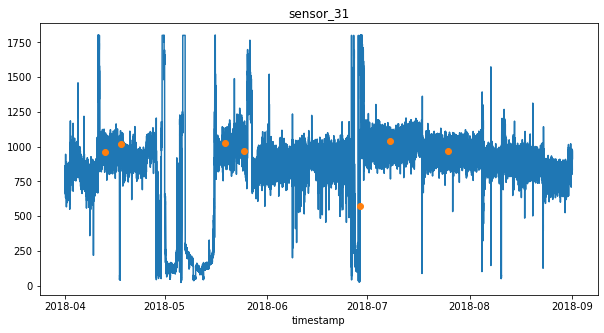

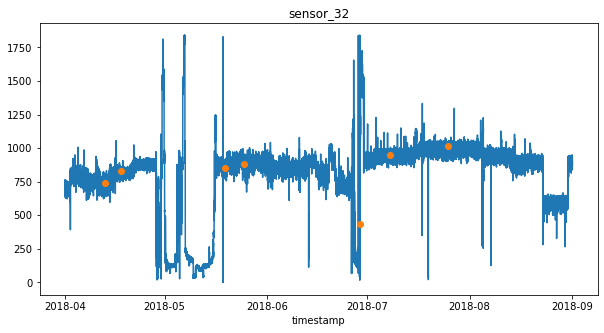

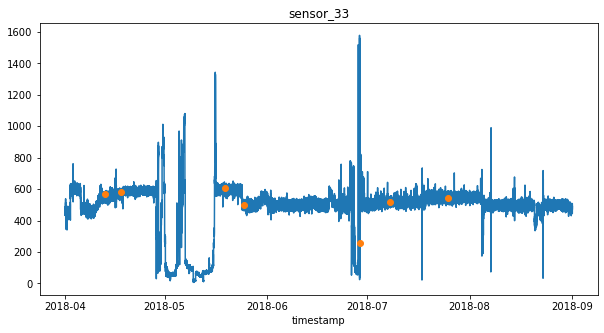

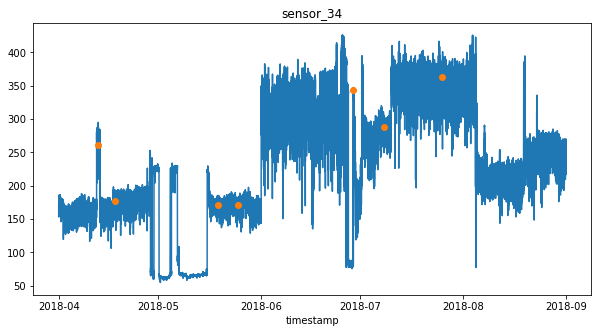

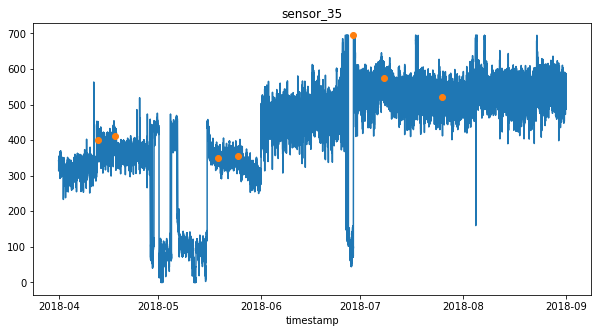

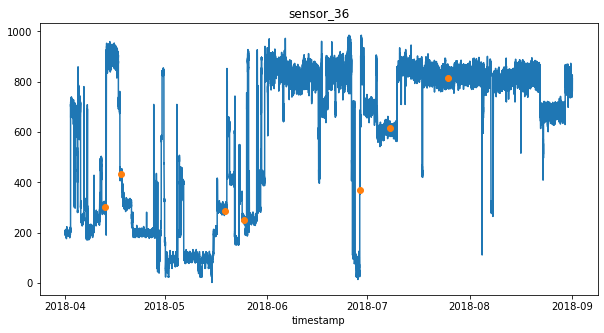

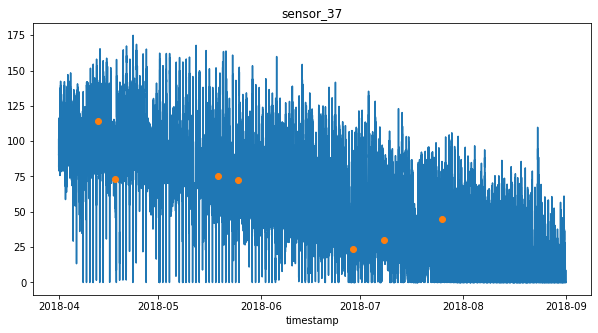

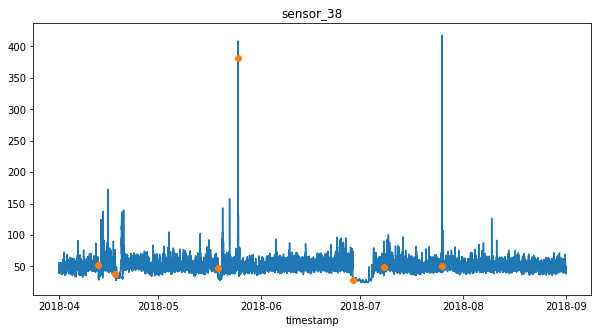

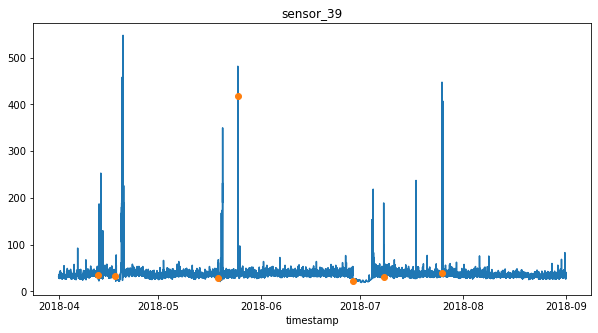

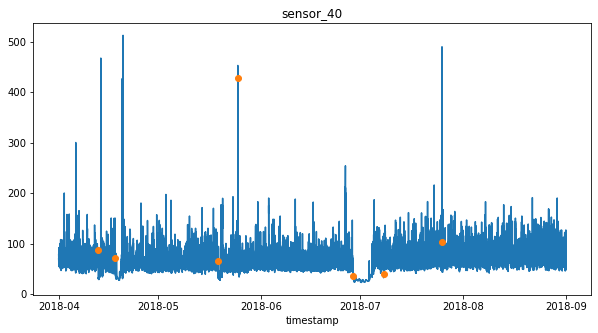

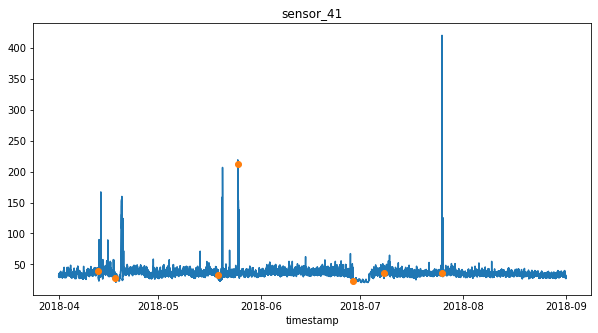

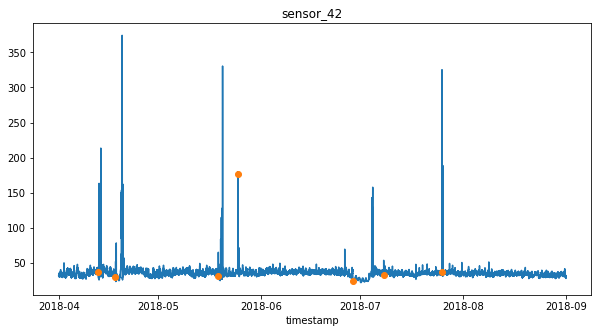

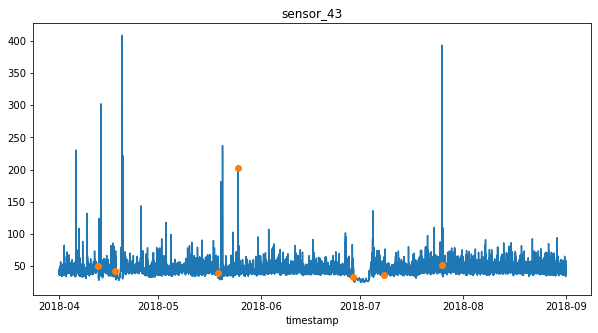

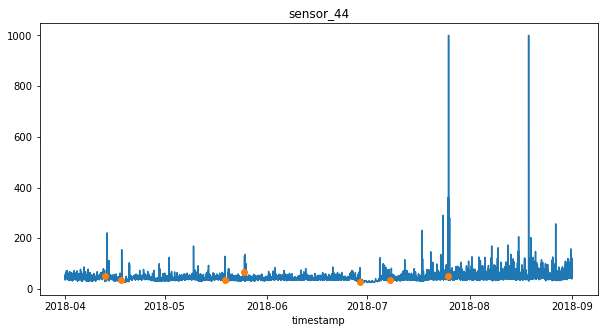

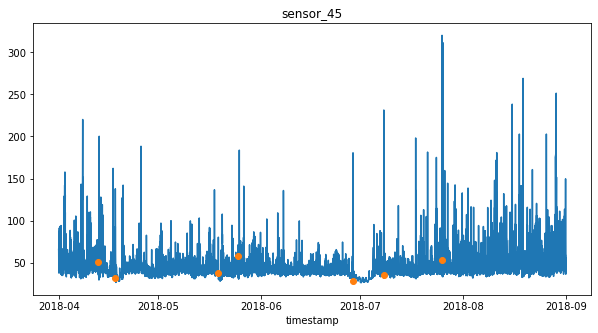

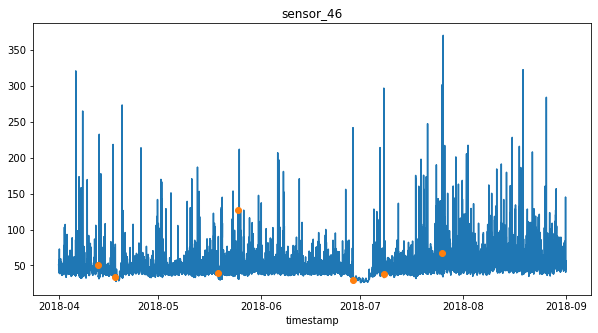

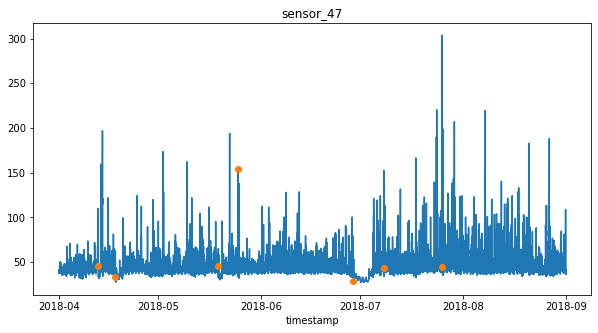

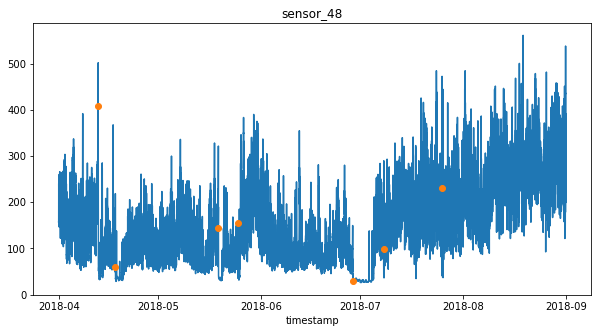

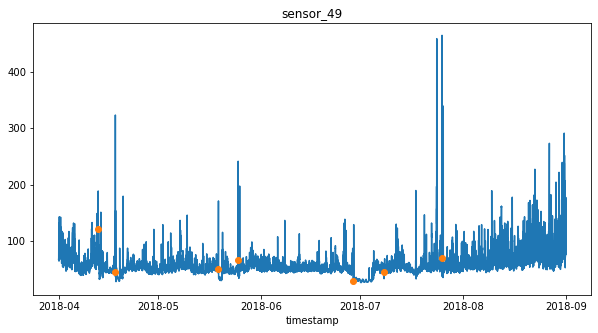

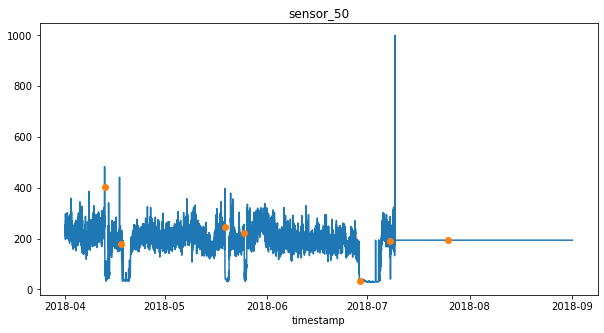

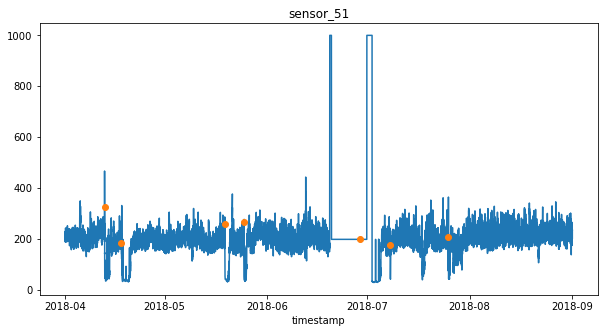

In [281]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[col])
    plt.plot(status_broken[col], linestyle='none', marker = 'o')
    plt.title(col)
    plt.xlabel('timestamp')
    plt.show()

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [283]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

In [284]:
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
principal_df.head()

,PC1,PC2
0,69.863141,264.831902
1,69.863141,264.831902
2,28.182622,282.602866
3,24.888462,289.387864
4,29.968073,293.762044


In [285]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.sum()))

Explained variation per principal component: 0.8166608939813645


In [286]:
data['PC1'] = pd.Series(principal_df['PC1'].values, index=data.index)
data['PC2'] = pd.Series(principal_df['PC2'].values, index=data.index)

In [287]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(principal_df['PC1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.976351
p-value: 0.000025
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [288]:
result = adfuller(principal_df['PC2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.532967
p-value: 0.000002
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [289]:
PC1_diff = principal_df['PC1'].diff().dropna()
PC2_diff = principal_df['PC2'].diff().dropna()

In [290]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

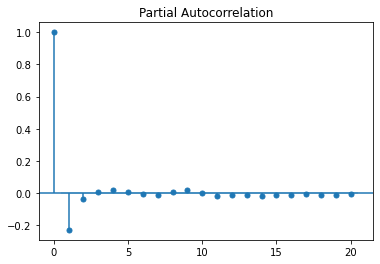

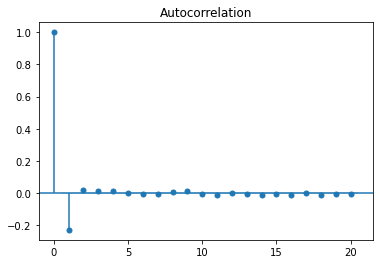

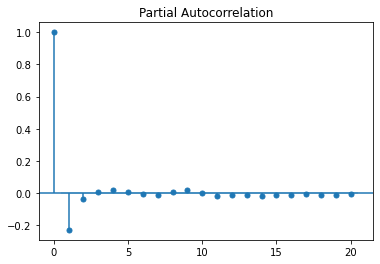

In [291]:
plot_acf(PC1_diff, lags=20)
plot_pacf(PC1_diff, lags=20)

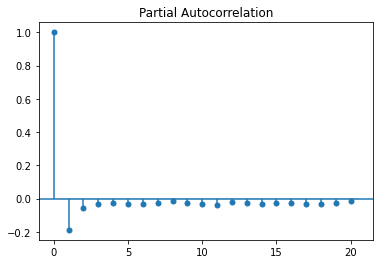

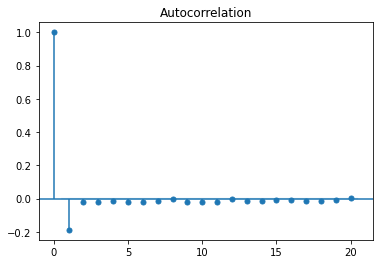

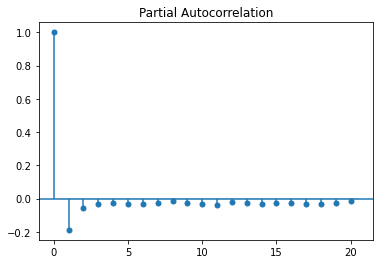

In [292]:
plot_acf(PC2_diff, lags=20)
plot_pacf(PC2_diff, lags=20)

In [293]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(principal_df)
clusters = kmeans.predict(principal_df.values)

In [294]:
data['clusters'] = clusters

In [295]:
data['clusters'].value_counts()

0    196656
1     23664
Name: clusters, dtype: int64

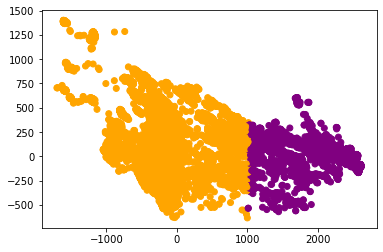

In [296]:
colors = {0:'orange', 1:'purple'}
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=data['clusters'].apply(lambda x: colors[x]))
plt.show()

In [297]:
def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=df.index)

In [298]:
outliers_fraction = 0.07
distance = getDistanceByPoint(principal_df, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

In [299]:
anomaly = pd.DataFrame((distance >= threshold).astype(int))

In [300]:
principal_df['anomaly'] = anomaly.values

In [301]:
principal_df.head()

,PC1,PC2,anomaly
0,69.863141,264.831902,0
1,69.863141,264.831902,0
2,28.182622,282.602866,0
3,24.888462,289.387864,0
4,29.968073,293.762044,0


In [304]:
principal_df['anomaly'].value_counts(normalize=True)

0    0.930002
1    0.069998
Name: anomaly, dtype: float64

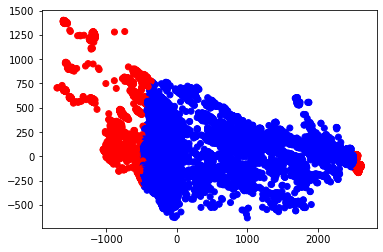

In [303]:
colors = {0:'blue', 1:'red'}
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['anomaly'].apply(lambda x: colors[x]))
plt.show()

In [305]:
data['anomaly'] = pd.Series(principal_df['anomaly'].values, index=data.index)

In [306]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,PC1,PC2,clusters,anomaly
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,69.863141,264.831902,0,0
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,69.863141,264.831902,0,0
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,28.182622,282.602866,0,0
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,24.888462,289.387864,0,0
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,29.968073,293.762044,0,0


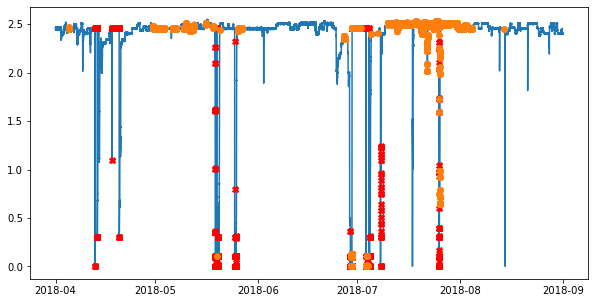

In [322]:
anomaly = data[data['anomaly']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_00'])
plt.plot(status_broken['sensor_00'], linestyle='none', marker = 'X', color='r')
plt.plot(anomaly['sensor_00'], linestyle='none', marker = 'o')

In [324]:
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.07
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principal_df.values) 
principal_df['anomaly'] = pd.Series(model.predict(principal_df.values))

In [328]:
principal_df['anomaly'].value_counts()

 1    204898
-1     15422
Name: anomaly, dtype: int64

In [329]:
principal_df['anomaly'].value_counts(normalize=True)

 1    0.930002
-1    0.069998
Name: anomaly, dtype: float64

In [336]:
data['anomaly'] = pd.Series(principal_df['anomaly'].values, index=data.index)

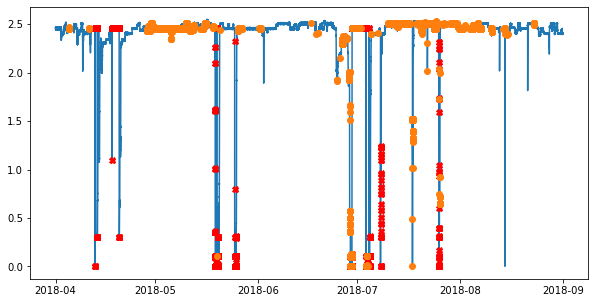

In [337]:
anomaly = data[data['anomaly']==-1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_00'])
plt.plot(status_broken['sensor_00'], linestyle='none', marker = 'X', color='r')
plt.plot(anomaly['sensor_00'], linestyle='none', marker = 'o')